# Анализ продаж игр интернет-магазина "Стримчик"

**Цель исследования:** выявить определяющие успешность игры закономерности.

**Заказчик:** интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры.

**Ход анализа:** 
* Предобработка данных
* Исследовательский анализ данны
* Портрет пользователя каждого региона
* Проверка гипотез

## Чтение файла и изучение информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
# код для отображения 200 столбцов в датасетах
pd.options.display.max_columns = 200

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


При первичном взгляде нам необходимо проработать с пропусками, наименованием столбцов, с типом данных. Явных дубликатов и аномальных числовых значений не выявленно. 


Согласно документации:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

## Предобработка данных

In [8]:
# Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [9]:
# проверка 
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# Посмотрим на пропуски в столбце name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки следует удалить, так как мы ничего толком не можем сказать об этих играх и тут всего 2 пропуска.

In [11]:
data = data.dropna(subset = ['name'])

In [12]:
# Посмотрим на пропуски в столбце year_of_release
data[data['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [13]:
# проценти пропусков в столбце year_of_release
len(data[data['year_of_release'].isnull()]) / len(data)

0.016095255190570215

Так как данные пропуски менее 2% от всего датасета и эти пропуски значительно не повлияют на ход исследования, их так же можно удалить.

In [14]:
data = data.dropna(subset = ['year_of_release'])

In [15]:
# Посмотрим на пропуски в столбце rating
data[data['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Чаще всего пропуски одновремено и в рейтинге, и в оценках пользователей и критиков. Так как данных пропусков очень много удалить мы их не можем. Заменять средней или медианной в данном случае будет некорректным, то следует поставить заглушку для дальнейшего удобства.

In [16]:
# Заменим пропуски на Unknown, и посмотри уникальные значения.
data['rating'] = data['rating'].fillna('Unknown')
data['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

4 вида рейтинга встречаются часто: Е, Т, М и Е10+. Еще 4 почти не встречаются. Их можно заменить:

* АО - на М;
* RP - фактически, рейтинг не известен. Можно заменить на Unknown;
* ЕС - на Е;
* К-А - на Е.

In [17]:
# заменяем рейтинг
data.loc[data['rating'] == 'AO', 'rating'] = 'M'
data.loc[data['rating'] == 'RP', 'rating'] = 'Unknown'
data.loc[data['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'

In [18]:
# проверка
data['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [19]:
# Посмотрим на пропуски в столбце critic_score
data[data['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown


Так как пропусков очень много, то удалять и восстонавливать мы их не можем. Заменять средней или медианной в данном случае будет некорректным. Предлагаю оставить пропуски не тронутыми и не заставить заглушку, так как у нас числовой тип.

In [20]:
# Посмотрим на пропуски в столбце user_score
data[data['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown


Так как пропусков очень много, то удалять и восстонавливать мы их не можем. Заменять средней или медианной в данном случае будет некорректным. Предлагаю оставить пропуски не тронутыми и не заставить заглушку, так как у нас числовой тип.

In [21]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [22]:
# процент tbd в столбце user_score
len(data[data['user_score'] == 'tbd'])/len(data)

0.14449039163220628

tbd означает "To Be Determined" - т.е., оценка будет определена позже. По смыслу это ничем не отличается от пропуска. При этом таких значений - 14,5%. Мы не можем их ни удалить, ни восстановить, поэтому заменяем на NaN и оставляем не тронутым.

In [23]:
# заменяем значения tbd на NaN и выведем уникальные значения 
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [24]:
# приведем типы данных
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('float')
data['user_score'] = data['user_score'].astype('float')

In [25]:
# Найдем общие продажи по регионам
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод

На этапе предообработке данных, мы:

- привели название стобцов к нижнему регистру; 
- поработали с пропусками, где это было возможным и логичным; 
- проработали со значением "tbd";
- преобразовали в необходимые типы данных;
- добавили столбец с общими продожами по всем регионам.

## Исследовательский анализ данных

### Количество выпускаемых игр по годам.

In [27]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = data.groupby('year_of_release')[['total_sales']].sum().join(
    data.groupby('year_of_release')[['name']].count()
)
years_df.columns = ['total_sales', 'number_of_games']

line0 = go.Scatter(
    x=years_df.index,
    y=years_df.total_sales,
    name='Количество проданных копий, млн.'
)

line1 = go.Scatter(
    x=years_df.index,
    y=years_df.number_of_games,
    name='Количество выпущенных игр'
)

lines = [line0, line1]
layout = {'title': 'Динамика выпуска игр по годам'}
# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=lines, layout=layout)
iplot(fig, show_link=False)

Судя по графику мы можем увидеть как начали расти количество выпушенных игр и проданных копий с 80-ых до 2008 г. достигнув плато и далее все пошло на спад. Скорей всего это объяснимо тем, что с 2008 года стали развиваться мобильная разработка и браузерные игры.

Для прогноза на 2017 год нам необходимы будут не все года, а только небольшой период после 2013 г., так как мы можем наблюдать рост и далее спад, то более старые года будут не актуальны для проноза.

### Анализ продаж по платформам

Text(0, 0.5, 'Количество продаж')

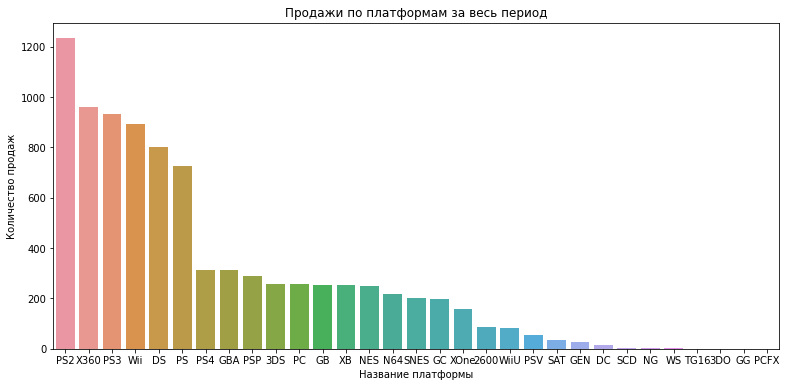

In [28]:
platform_on_sales = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

На графике по анализу продаж по платформам за весь период мы можем видеть, что больше всего продано копий было на  PS2, X360, PS3, WII, DS, PS, но не понятно на какие года приходится большая часть продаж, так как за интересующие нас года продажи падали и менялись платформы. 

PS2


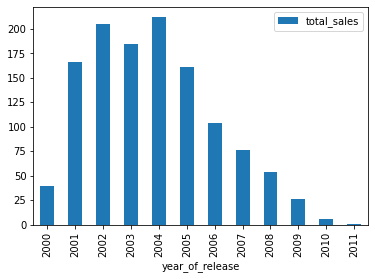

X360


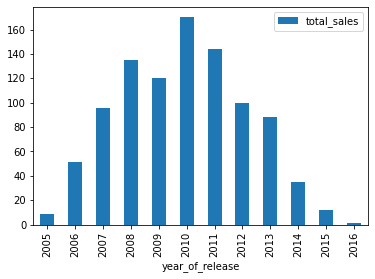

PS3


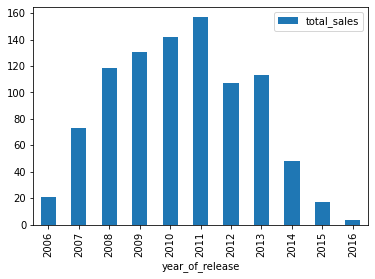

Wii


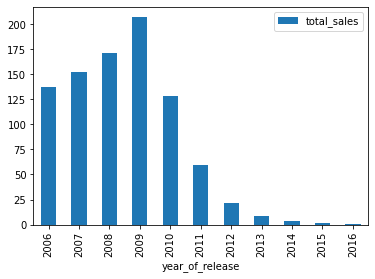

DS


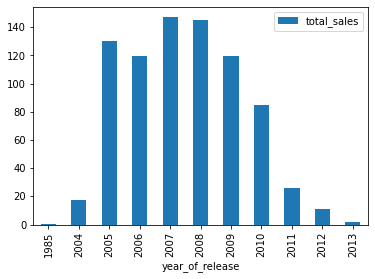

PS


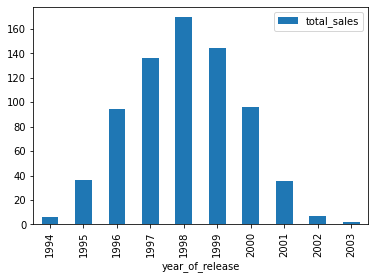

In [29]:
# построим график по распределению по годам продаж первых 6-ти популярных платформ
for platform in platform_on_sales.index[:6]:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

По данным графикам можно сказать: 
- почти все графики имеют нормальное распределение;
- платформы существуют не менее 10 лет, за исключением DS это скорей всего ошибка в данных, так как из внешних источников она вышла в 2004 г.; 
- самый пик продаж приходится примерно через 4-5 лет после выхода приставки и далее идет на спад; 
- в 2016 г. из самых популярных платформ за все время совсем мало, но продаются только: X360, PS3, WII. 

### Определение актуального периода и лидирующих платформ по продажам

Как говорилось в п. 3.1, более информативный период за последние года перед годом на который мы прогнозируем. Предагаю взять анализ за период в 4 года с 2013-2016 г.г., так как самый расцвет приходится на 4-5 год после выхода платформы.

In [30]:
# отрезаем старые данные
new_data = data.query('year_of_release >= 2013').copy()

Text(0, 0.5, 'Количество продаж')

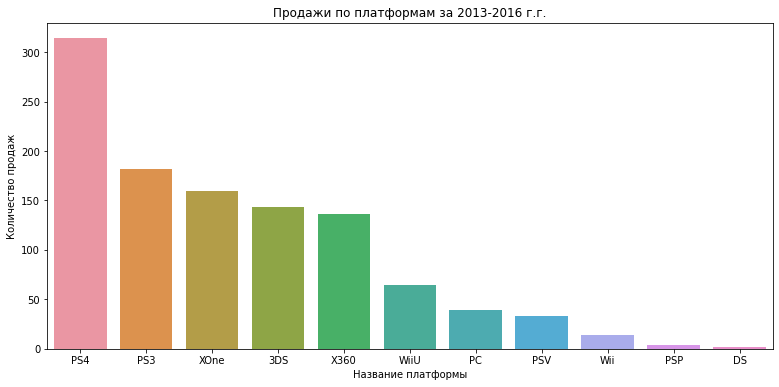

In [31]:
# по срезу формируем сводную таблицу и строим столбчатую диаграмму
platform_on_sales_new = (
    new_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales_new.index,y=platform_on_sales_new['total_sales'])
plt.title("Продажи по платформам за 2013-2016 г.г.")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Судя по графику за актуальный период самые популярные платформы это уже: PS4, PS3, XOne, 3DS, X360. но давайте посмотрим все данные платформы по разбивке по годам, что бы определить те платформы, которые уже угасают и те кто находится в росте.

PS4


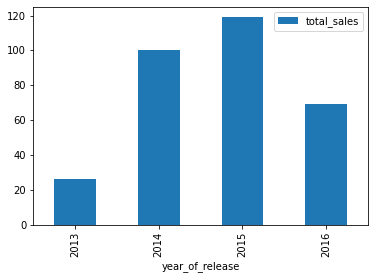

PS3


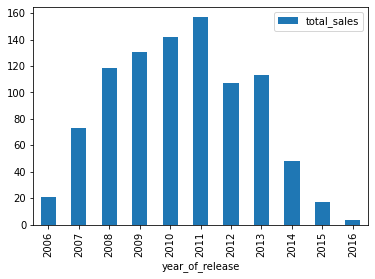

XOne


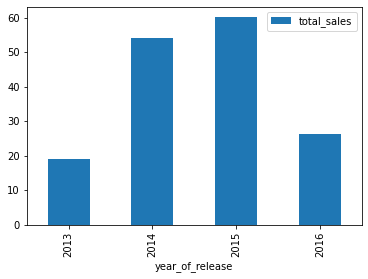

3DS


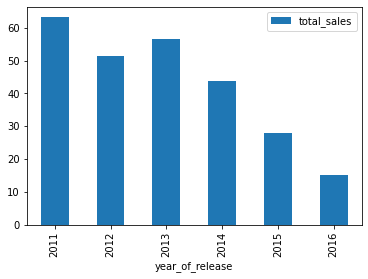

X360


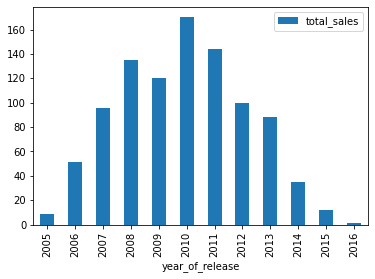

WiiU


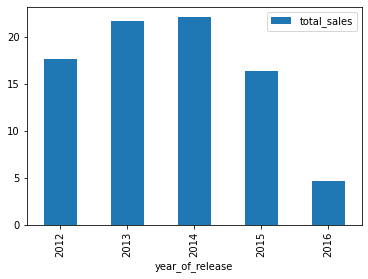

PC


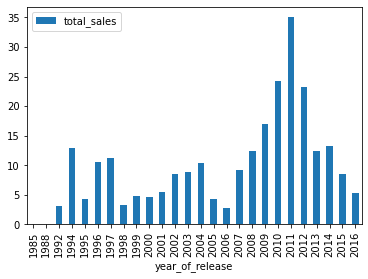

PSV


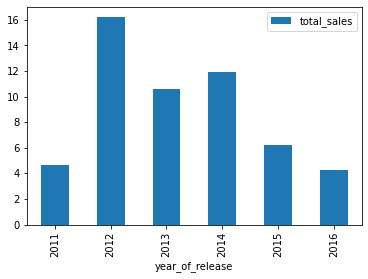

Wii


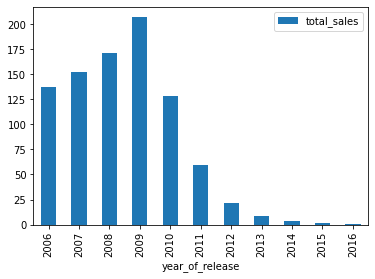

PSP


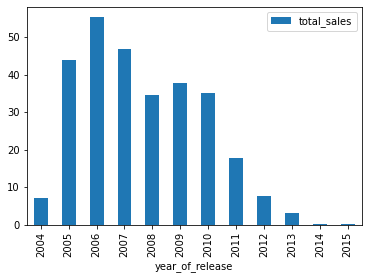

DS


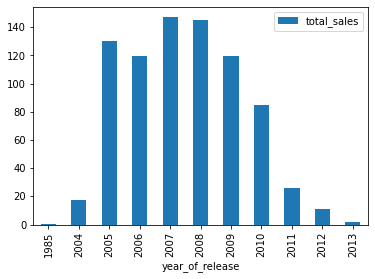

In [32]:
# функция строящая диаграммы продаж по платформам
for platform in platform_on_sales_new.index:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Все платформы уже достигли пика и идут на спад, но еще есть "куда падать" только  PS4, XOne и 3DS. Поэтому предполагаю, что это 3 самые актуальные платформы. 

In [33]:
# перезаписываем new_data, срез только по преспективным платформам
new_data = new_data.query('platform in ["PS4", "XOne", "3DS"]')
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,Unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


Актульный период это последние 4 года, т.е. с 2013-2016 г.г. и потенциально прибыльные платформы на 2017 год это: PS4, XOne и 3DS.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

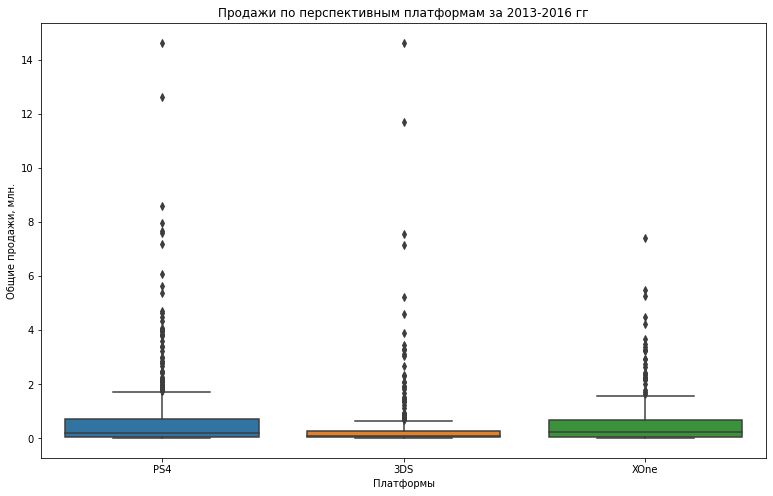

In [34]:
# строим ящик с усами по глобальным продажам
plt.figure(figsize=(13, 8))
(sns.boxplot(data = new_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи, млн.'))
plt.show()

Из-за сильно выбивающих значений почти ничего не понятно на графике, предлагаю обрезать график по оси у до 2-ух, рядом с квартилем.

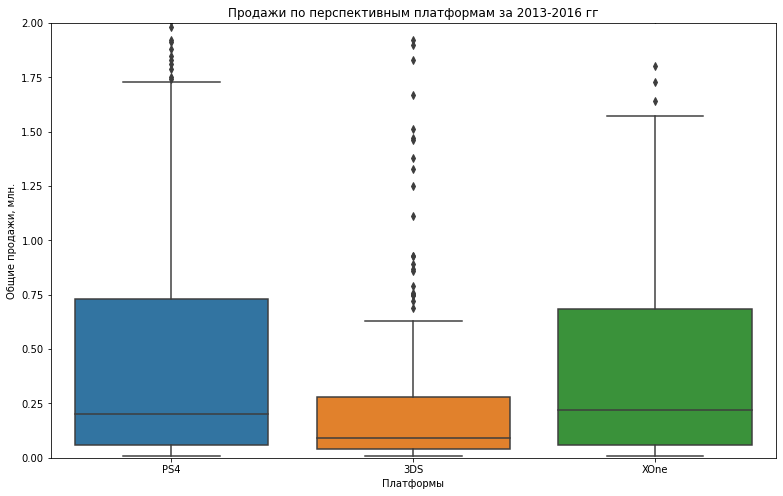

In [35]:
# перестраиваем ящик с усами по глобальным продажам, ограничивая метрику по у
plt.figure(figsize=(13, 8))
(sns.boxplot(data = new_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи, млн.', ylim=(0, 2)))

plt.show()

Мы можем увидеть, что по продажам на PS4 и XOne, примерно одинаковые квартили и медианы. у 3DS еще есть запал по продажам игр, но сама по себе платформа менее популярна, чем указанные выше. По всем продажам несомненно лидирует PS4.

###  Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

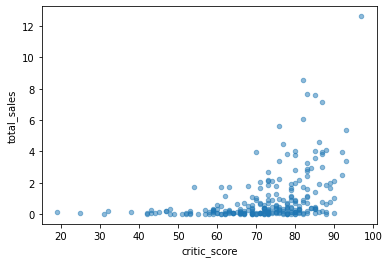

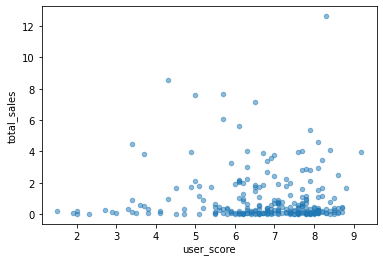

0.40656790206178095
-0.031957110204556376


In [36]:
# строим диаграммы рассеявание и определяем корреляцию
head_platform = new_data[new_data['platform'] == "PS4"]
head_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
head_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.show()
print(head_platform['critic_score'].corr(head_platform['total_sales']))
print(head_platform['user_score'].corr(head_platform['total_sales']))

По вышеуказанным диаграммам рассеявания и корреляции можно сказать, что есть небольшая прямо пропорциональная зависимость от оценки критиков, а вот от оценок пользователей продажи совсем не зависят.

Поэтому можно делать ставки на игры, которые хорошо оценятся критиками.

Предлагаю сверить корреляцию с двумя другими видами платформ:

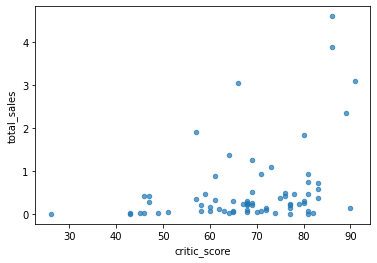

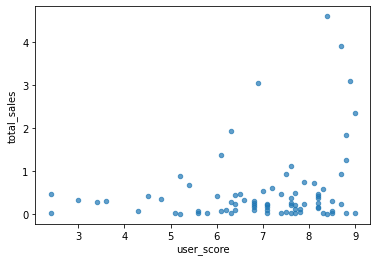

0.3570566142288103
0.24150411773563016


In [37]:
# строим диаграммы рассеявание и определяем корреляцию
head_platform = new_data[new_data['platform'] == "3DS"]
head_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7)
head_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7)
plt.show()
print(head_platform['critic_score'].corr(head_platform['total_sales']))
print(head_platform['user_score'].corr(head_platform['total_sales']))

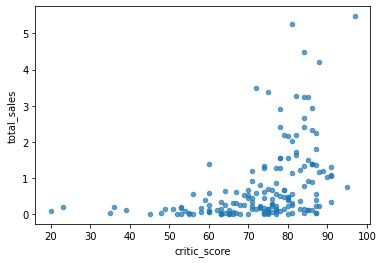

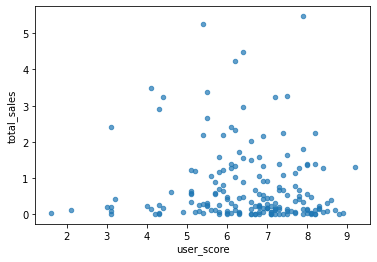

0.4169983280084017
-0.06892505328279414


In [38]:
# строим диаграммы рассеявание и определяем корреляцию
head_platform = new_data[new_data['platform'] == "XOne"]
head_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7)
head_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7)
plt.show()
print(head_platform['critic_score'].corr(head_platform['total_sales']))
print(head_platform['user_score'].corr(head_platform['total_sales']))

По двум другим так же замечена зависимость от оценки критиков, но только на одной платформе есть прямая зависимость от оценок пользователей. Поэтому при планировании продаж не стоит ориентироваться на оценку пользователей.

### Анализ самых прибыльных жанров

Предлагаю анализировать самые прибыльные жанры на таблице с актуальным периодом и на основании потенциально выгодных платформ.

Text(0, 0.5, 'Общие продажи')

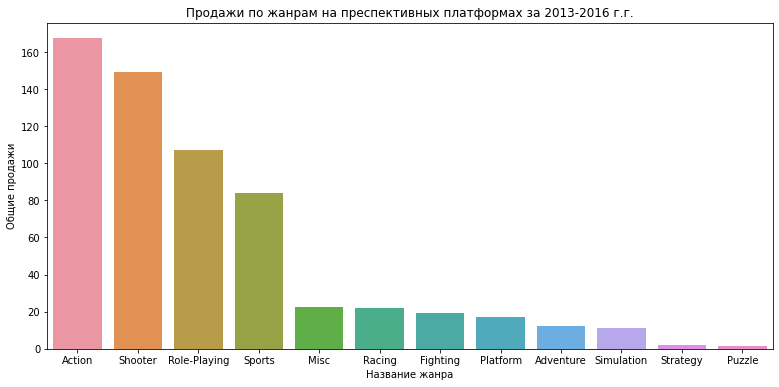

In [39]:
# строим столбчатую диаграмму по жанрам и продажам
genre_sales = new_data.pivot_table(index='genre', values='total_sales', aggfunc ='sum').sort_values('total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=genre_sales.index,y=genre_sales['total_sales'])
plt.title("Продажи по жанрам на преспективных платформах за 2013-2016 г.г.")
plt.xlabel("Название жанра")
plt.ylabel("Общие продажи")

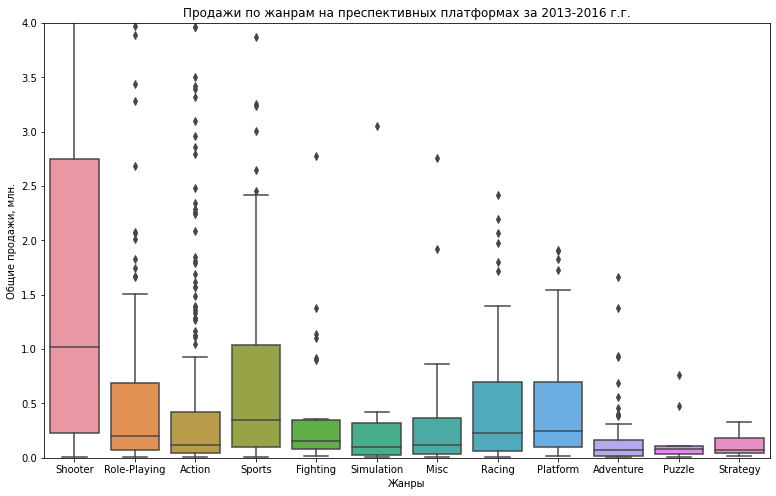

In [40]:
# строим ящики с усами по жанрам и продажам
plt.figure(figsize=(13, 8))
(sns.boxplot(data = new_data, y = 'total_sales', x='genre').set(title = "Продажи по жанрам на преспективных платформах за 2013-2016 г.г.", xlabel = 'Жанры', ylabel = 'Общие продажи, млн.', ylim=(0, 4)))

plt.show()

In [41]:
new_data['genre'].value_counts()

Action          345
Role-Playing    127
Sports           92
Shooter          80
Misc             71
Adventure        69
Racing           39
Fighting         32
Platform         32
Simulation       25
Strategy         20
Puzzle           10
Name: genre, dtype: int64

Судя по графику, мы можем сказать, что самые популярные жанры: Action, Shooter, Role-Playing, Sports. Но при этом медианные значения высокие у Shooter, Sports, Role-Playing, Racing, Platform. Это связано с тем, что жанров Action выпускается значительно больше, чем все остальные. 

Поэтому можно сделать акцент на жанрах: Shooter, Sports, Role-Playing. И в связи с большим количеством выпускаемых Action игр иметь их так же в ассортиментной матрице.

### Вывод

**При аналезе данных мы выяснили, что:** 
- количество выпущенных игр и проданных копий росло с 80-ых до 2008 г. достигнув плато и далее все пошло на спад. Скорей всего это объяснимо тем, что с 2008 года стали развиваться мобильная разработка и браузерные игры.
- Для прогноза на 2017 год нам необходимы будут не все года, а только последние 4 года, т.е. с 2013-2016 г.г. и потенциально прибыльные платформы на 2017 год это: PS4, XOne и 3DS.
- Платформы существуют не менее 10 лет.
- Самый пик продаж приходится примерно через 4-5 лет после выхода приставки и далее идет на спадю 
- В 2016 г. из самых популярных платформ за все время совсем мало, но продаются только: X360, PS3, WII. 

**При планировании на 2017 год потенциально прибыльных и более активно продоваемых игр, стоит обратить внимание на:**

- Мы можем увидеть, что по продажам на PS4 и XOne примерно одинаковые объемы  у 3DS еще есть запал по продажам игр, но сама по себе платформа менее популярна, чем указанные выше. По всем продажам несомненно лидирует PS4.
- Есть прямопропорциональная зависимость от оценки критиков, а вот от оценок пользователей продажи совсем не зависят.Поэтому можно делать ставки на игры, которые хорошо оценятся критиками.
- Самые популярные жанры: Action, Shooter, Role-Playing, Sports. Но при этом медианные значения высокие у Shooter, Sports, Role-Playing, Racing, Platform. Это связано с тем, что жанров Action выпускается значительно больше, чем все остальные. Поэтому можно сделать акцент на жанрах: Shooter, Sports, Role-Playing. И в связи с большим количеством выпускаемых Action игр иметь их так же в ассортиментной матрице.

**"Идеальная" игра выглядит так:** игра с хорошим рейтингом критиков, выпущенная на PS4 и меющая жанр Shooter.


## Портрет пользователя кажого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [42]:
def for_pivot_5(row, title):
    new_data = data[data['year_of_release'] >= 2013]   
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = new_data.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        
        sns.set_palette("BuGn")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

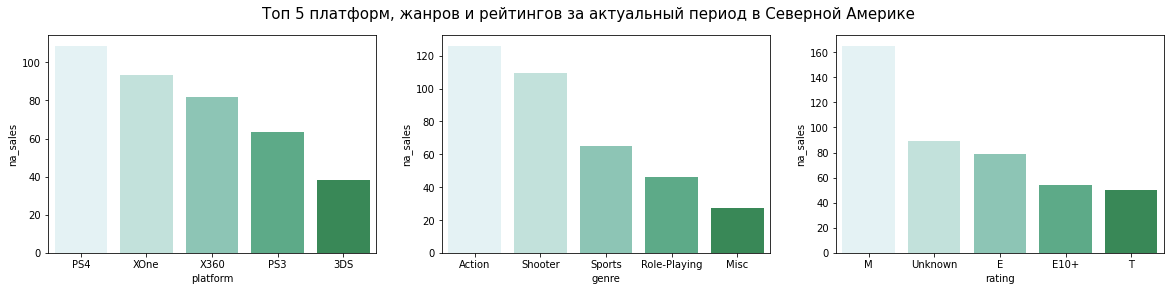

In [43]:
for_pivot_5('na_sales','Топ 5 платформ, жанров и рейтингов за актуальный период в Северной Америке')

В северной америке:
- самые популярные платформы это PS4, XOne, X360, PS3, 3DS;
- самые популярные жанры это Action, Shooter, Sports, Role-Playing, Misc 
- самый популярный рейтинг это рейтинг для всех, потом идет рейтинг от 17 лет, на третьем 10+

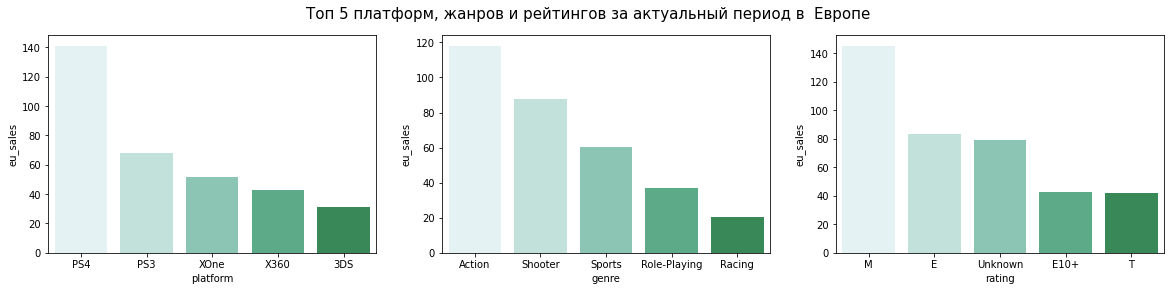

In [44]:
for_pivot_5('eu_sales','Топ 5 платформ, жанров и рейтингов за актуальный период в  Европе')

В Европе:
- самые популярные платформы это PS4, PS3, XOne, X360, 3DS;
- самые популярные жанры это Action, Shooter, Sports, Role-Playing, Racing 
- самый популярный рейтинг это рейтинг для всех, потом идет рейтинг от 17 лет, на третьем 10+

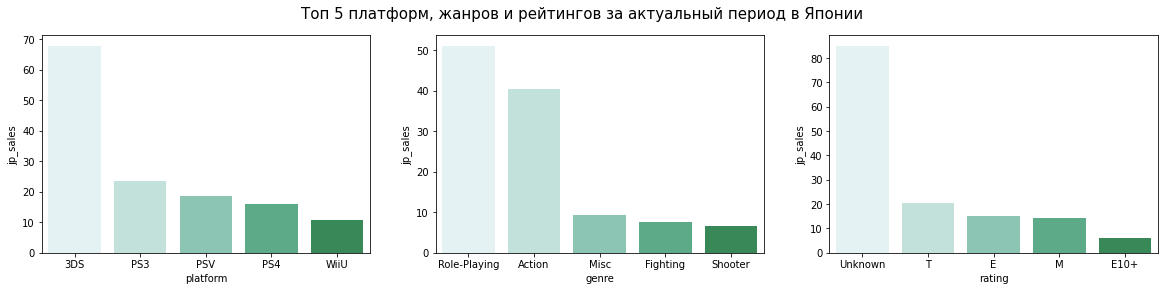

In [45]:
for_pivot_5('jp_sales','Топ 5 платформ, жанров и рейтингов за актуальный период в Японии')

В Японии:
- самые популярные платформы это 3DS, PS3, PSV, PS4, WiiU;
- самые популярные жанры это Role-Playing, Action, Misc, Fighting, Shooter;
- самый популярный рейтинг это рейтинг от 13 лет, потом идет рейтинг от 17 лет, на третьем для всех.

### Вывод

Мы составили портерты пользователей: по платформам, жанрам и рейтингу в Северной Америке, Европе и Японии. В Северной Америке и Японии топ-5 по этим критериям очень схожи, а вот в Японии значительно отличаются. Там больше используют PS и DS, объяснимо думаю тем, что PS это японская платформа и они больше используют их. Так же Японцам интересны Ролевые игры это думаю заложено больше културой. Так же здесь большая доля в рейтинге это пропуске, когда как в Америке и Европе она посередине, возможно это связно с другой системой рейтингов в Азии. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [46]:
# удаляем пропуски
data = data.dropna(subset=['user_score'])
# проводим статистический тест 
sample_1 = data[data['platform'] == "XOne"]['user_score']
sample_2 = data[data['platform'] == "PC"]['user_score']
results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# выведем среднее    
print('Средняя оценка XOne:', data[data['platform'] == "XOne"]['user_score'].mean())
print('Средняя оценка PC:', data[data['platform'] == "PC"]['user_score'].mean())

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу
Средняя оценка XOne: 6.521428571428572
Средняя оценка PC: 7.065960264900661


После статистического теста отвергаем нулевую гипотезу, и действительно, средний рейтинг этих двух платформ отличается на 0.54.

### Средние пользовательские рейтинги жанров Action и Sports разные

**H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**H1**: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [47]:
# удаляем пропуски
data = data.dropna(subset=['user_score'])
# проводим статистический тест 
sample_1 = data[data['genre'] == "Action"]['user_score']
sample_2 = data[data['genre'] == "Sports"]['user_score']
results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# выведем среднее    
print('Средняя оценка Action:', data[data['genre'] == "Action"]['user_score'].mean())
print('Средняя оценка Sports:', data[data['genre'] == "Sports"]['user_score'].mean())

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу
Средняя оценка Action: 7.058129175946549
Средняя оценка Sports: 6.951433857539316


После статистического теста мы не можем отвергнуть нулевую гипотезу. И правда среднии оценки этих жанров почти не отличаются.

### Вывод

При проверке гипотез мы выявели, что средние пользовательские рейтинги рейтинги платформ Xbox One и PC различаютсяю А вот средние пользовательские рейтинги рейтинги жанров Action и Sports практически не отличаются.

## Общий вывод

На этапе предообработке данных, мы:

- привели название стобцов к нижнему регистру; 
- поработали с пропусками, где это было возможным и логичным; 
- проработали со значением "tbd";
- преобразовали в необходимые типы данных;
- добавили столбец с общими продожами по всем регионам.

**При аналезе данных мы выяснили, что:** 
- количество выпущенных игр и проданных копий росло с 80-ых до 2008 г. достигнув плато и далее все пошло на спад. Скорей всего это объяснимо тем, что с 2008 года стали развиваться мобильная разработка и браузерные игры.
- Для прогноза на 2017 год нам необходимы будут не все года, а только последние 4 года, т.е. с 2013-2016 г.г. и потенциально прибыльные платформы на 2017 год это: PS4, XOne и 3DS.
- Платформы существуют не менее 10 лет.
- Самый пик продаж приходится примерно через 4-5 лет после выхода приставки и далее идет на спадю 
- В 2016 г. из самых популярных платформ за все время совсем мало, но продаются только: X360, PS3, WII. 

**При планировании на 2017 год потенциально прибыльных и более активно продоваемых игр, стоит обратить внимание на:**

- Мы можем увидеть, что по продажам на PS4 и XOne примерно одинаковые объемы  у 3DS еще есть запал по продажам игр, но сама по себе платформа менее популярна, чем указанные выше. По всем продажам несомненно лидирует PS4.
- Есть прямопропорциональная зависимость от оценки критиков, а вот от оценок пользователей продажи совсем не зависят.Поэтому можно делать ставки на игры, которые хорошо оценятся критиками.
- Самые популярные жанры: Action, Shooter, Role-Playing, Sports. Но при этом медианные значения высокие у Shooter, Sports, Role-Playing, Racing, Platform. Это связано с тем, что жанров Action выпускается значительно больше, чем все остальные. Поэтому можно сделать акцент на жанрах: Shooter, Sports, Role-Playing. И в связи с большим количеством выпускаемых Action игр иметь их так же в ассортиментной матрице.

**"Идеальная" игра выглядит так:** игра с хорошим рейтингом критиков, выпущенная на PS4 и меющая жанр Shooter.
    
**Мы составили портерты пользователей:** по платформам, жанрам и рейтингу в Северной Америке, Европе и Японии. В Северной Америке и Японии топ-5 по этим критериям очень схожи, а вот в Японии значительно отличаются. Там больше используют PS и DS, объяснимо думаю тем, что PS это японская платформа и они больше используют их. Так же Японцам интересны Ролевые игры это думаю заложено больше културой. Так же здесь большая доля в рейтинге это пропуске, когда как в Америке и Европе она посередине, возможно это связно с другой системой рейтингов в Азии. 

**Портреты**

В Северной Америке:
- самые популярные платформы это PS4, XOne, X360, PS3, 3DS;
- самые популярные жанры это Action, Shooter, Sports, Role-Playing, Misc; 
- самый популярный рейтинг это рейтинг для всех, потом идет рейтинг от 17 лет, на третьем 10+.

В Европе:
- самые популярные платформы это PS4, PS3, XOne, X360, 3DS;
- самые популярные жанры это Action, Shooter, Sports, Role-Playing, Racing; 
- самый популярный рейтинг это рейтинг для всех, потом идет рейтинг от 17 лет, на третьем 10+.

В Японии:
- самые популярные платформы это 3DS, PS3, PSV, PS4, WiiU;
- самые популярные жанры это Role-Playing, Action, Misc, Fighting, Shooter;
- самый популярный рейтинг это рейтинг от 13 лет, потом идет рейтинг от 17 лет, на третьем для всех.


**Так же мы проверили гипотезы и выявели:**

- средние пользовательские рейтинги рейтинги платформ Xbox One и PC различаются.
- средние пользовательские рейтинги рейтинги жанров Action и Sports практически не отличаются.

**Рекомендации по планированию рекламного бюджета:**

- сделать небольшой акцент на рейтинге кинокритиков;
- больше заложить на рекламу игр на платформе PS4, XOne
- в жанре Action и Shooter
- сделать отдельную рекламную кампанию для Японии.